In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install kaggle

In [44]:
cd /content/drive/MyDrive/BrainTumorsClassifier

/content/drive/MyDrive/BrainTumorsClassifier


In [45]:
pwd

'/content/drive/MyDrive/BrainTumorsClassifier'

In [46]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 97% 144M/149M [00:04<00:00, 39.5MB/s]
100% 149M/149M [00:04<00:00, 36.1MB/s]


In [47]:
!unzip /content/drive/MyDrive/BrainTumorsClassifier/brain-tumor-mri-dataset.zip -d /content/drive/MyDrive/BrainTumorsClassifier/brain_tumor_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/BrainTumorsClassifier/brain_tumor_dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/drive/MyDrive/BrainTumorsClassifier/brain_tumor_dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/drive/MyDrive/BrainTumorsClassifier/brain_tumor_dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/drive/MyDrive/BrainTumorsClassifier/brain_tumor_dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/drive/MyDrive/BrainTumorsClassifier/brain_tumor_dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/drive/MyDrive/BrainTumorsClassifier/brain_tumor_dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/drive/MyDrive/BrainTumorsClassifier/brain_tumor_dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/drive/MyDrive/BrainTumorsClassifier/brain_tumor_dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/drive/MyDrive/BrainTumorsClassifier/bra

In [48]:
rm -rf /content/drive/MyDrive/BrainTumorsClassifier/brain-tumor-mri-dataset.zip

In [ ]:
from IPython.core.debugger import set_trace  # set_trace()

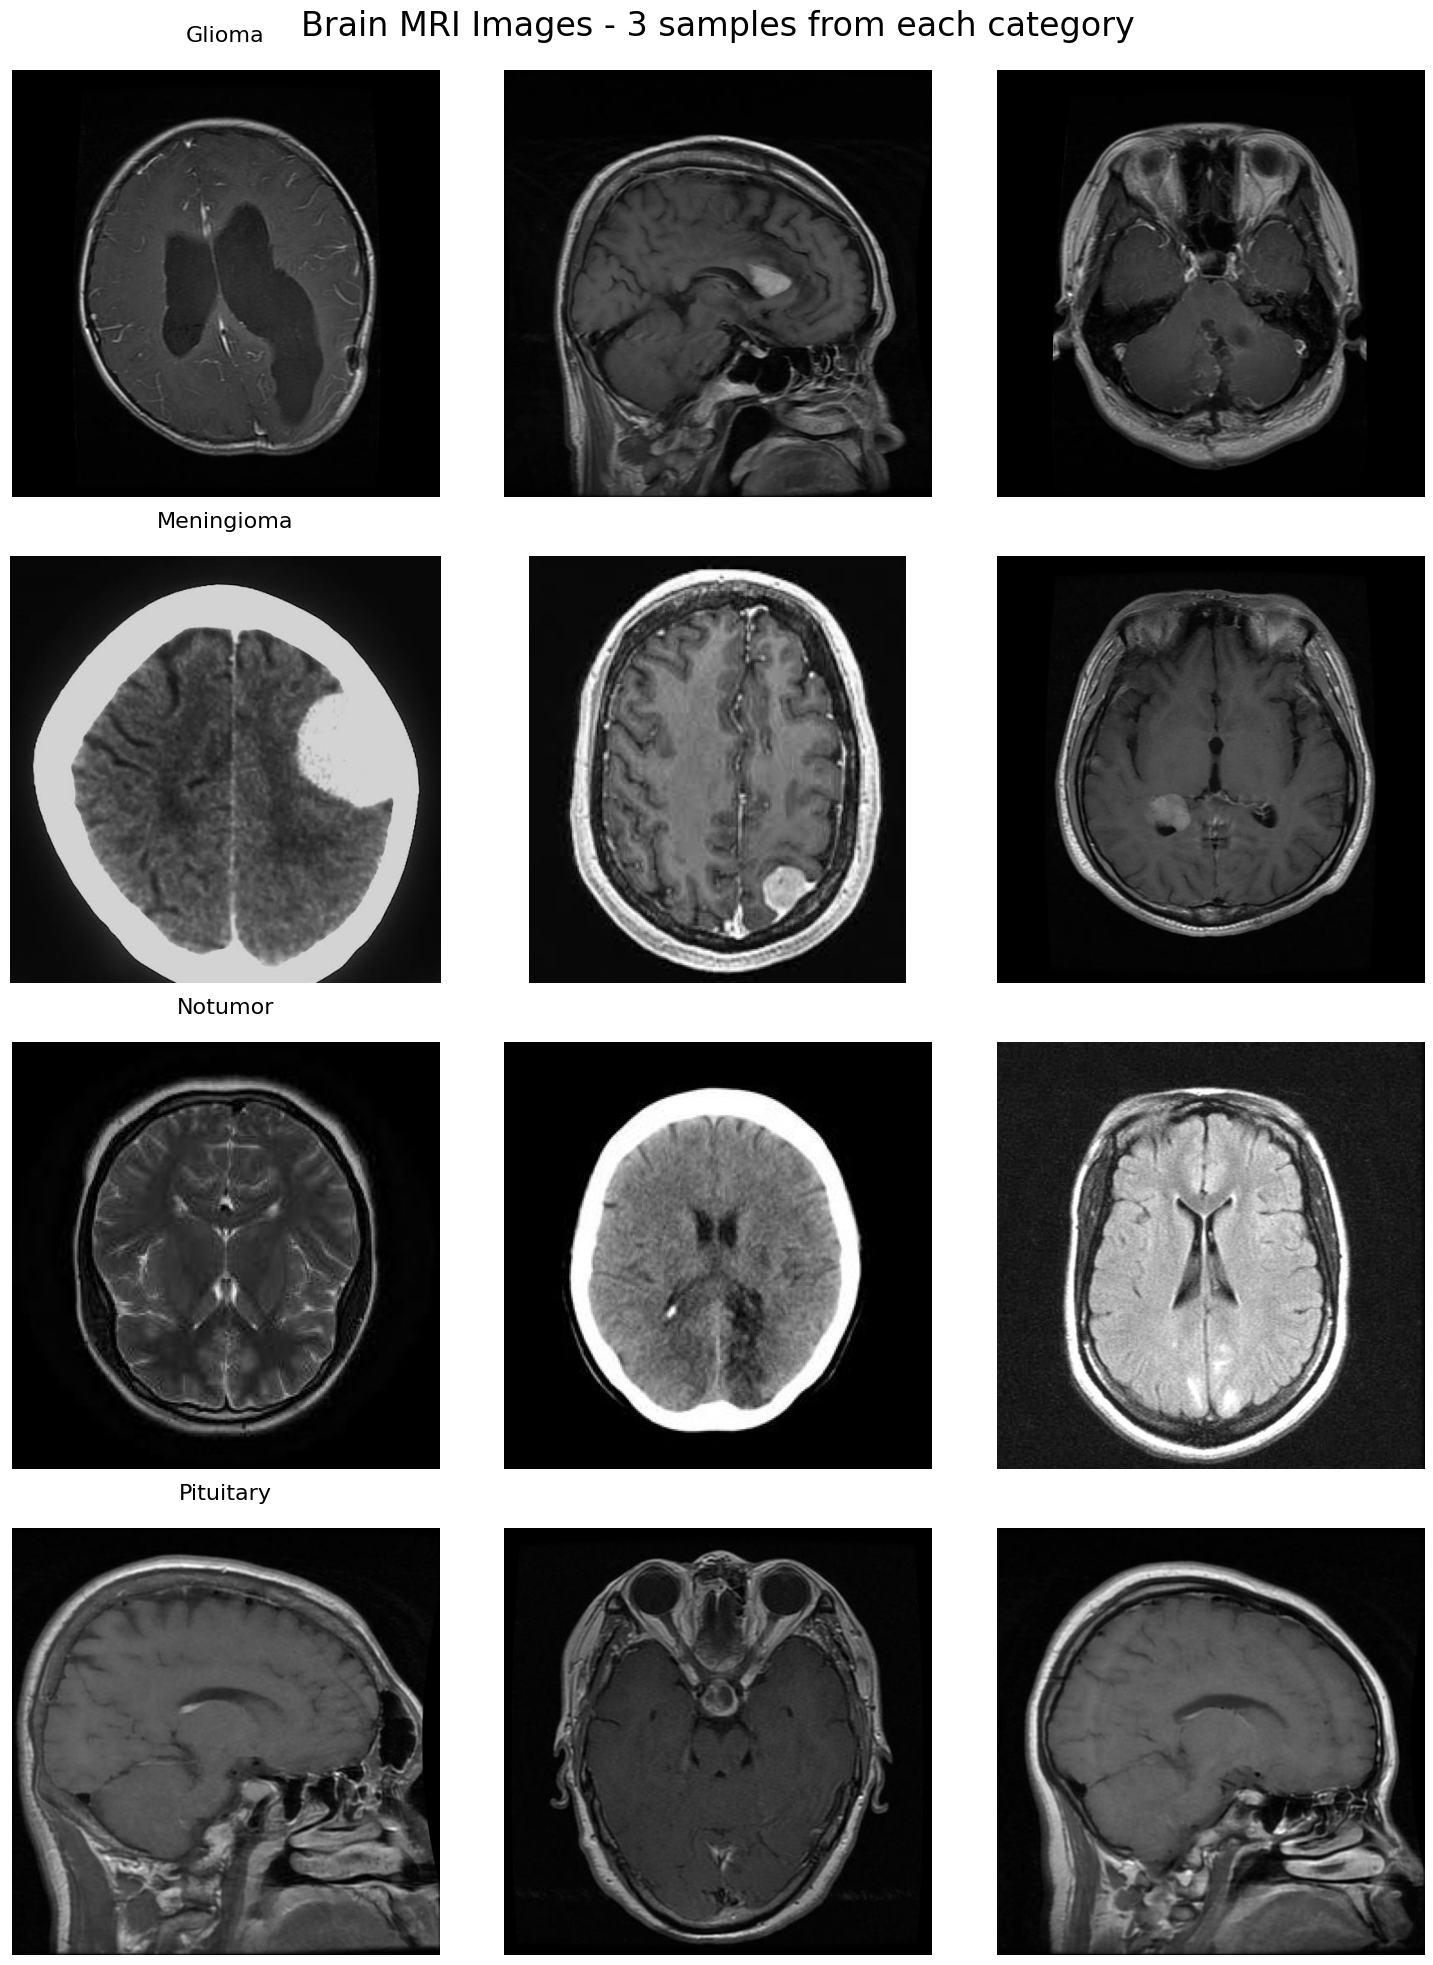

In [50]:
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
import glob


# Define the categories and their respective folders
categories = ['glioma', 'meningioma', 'notumor', 'pituitary'] #
base_path = '/content/drive/MyDrive/BrainTumorsClassifier/brain_tumor_dataset/Testing/'  # Adjust this path to your dataset location

# Create a 4x3 grid of subplots (12 total, 3 for each category)
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Brain MRI Images - 3 samples from each category', fontsize=24)

# Function to get random images from a folder
def get_random_images(folder_path, num_images=3):

    # real_path = os.path.realpath(folder_path)
    #images = [img for img in os.listdir(folder_path) if img.endswith(('.jpg'))]
    #images = glob.glob(os.path.join(folder_path, '*'))
    abs_directory =os.path.abspath(folder_path)
    images = glob.glob(os.path.join(abs_directory, '**/*.jpg'), recursive=True)
    if not images:
        breakpoint()
        return []
    return random.sample(images, min(num_images, len(images)))

# Plot images for each categoryc
for idx, category in enumerate(categories):
    folder_path = os.path.join(base_path, category)
    images = get_random_images(folder_path)
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        axes[idx, i].imshow(img, cmap='gray')
        axes[idx, i].axis('off')
        if i == 0:
            axes[idx, i].set_title(f"{category.capitalize()}", fontsize=16, pad=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()